In [1]:
import numpy as np
from scipy.optimize import curve_fit

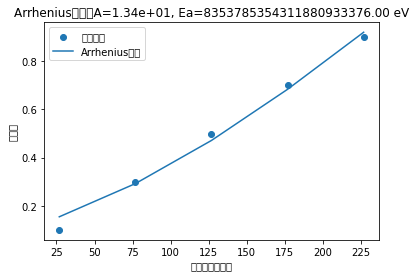

析晶活化能（Ea）：8353785354311880933376.00 eV


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据：温度（T）和析晶率（JMA）
T = [300, 350, 400, 450, 500]  # 以开尔文为单位的温度
JMA = [0.1, 0.3, 0.5, 0.7, 0.9]  # 示例析晶率数据

# 将温度转换为摄氏度
T_Celsius = [t - 273.15 for t in T]

# 定义Arrhenius方程模型用于拟合
def arrhenius_equation(t, A, Ea):
    return A * np.exp(-Ea / (t + 273.15))

# 使用curve_fit函数拟合数据
params, covariance = curve_fit(arrhenius_equation, T_Celsius, JMA, p0=[1, 1])

# 提取拟合参数
A, Ea_Joules = params
Ea_eV = Ea_Joules / 1.60218e-19  # 将活化能从焦耳转换为电子伏特

# 绘制数据和拟合曲线
plt.scatter(T_Celsius, JMA, label='实际数据')
plt.plot(T_Celsius, arrhenius_equation(np.array(T_Celsius), A, Ea_Joules), label='Arrhenius拟合')
plt.xlabel('温度（摄氏度）')
plt.ylabel('析晶率')
plt.legend()
plt.title(f'Arrhenius拟合：A={A:.2e}, Ea={Ea_eV:.2f} eV')  # 在标题中使用eV单位
plt.show()

# 输出析晶活化能
print(f'析晶活化能（Ea）：{Ea_eV:.2f} eV')
